Loading libraries

In [ ]:
#################################################################
#MultilayerPerceptron with keras
#Author: Edwyn Javier Aldana
################################################################
#Load libraries
#######################################################################################
#                           TensorFlow and tf.keras
#######################################################################################
import tensorflow as tf
from tensorflow import keras
#######################################################################################
#                              Other libraries
#######################################################################################
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, color

**Getting dataset**

We use an standard dataset from CIFAR10

In [ ]:
#Load dataset
#######################################################################################
#                                     Get data images
#######################################################################################
cifar10 = keras.datasets.cifar10
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()



**Exploring the dataset**

(32, 32, 3)
[5]


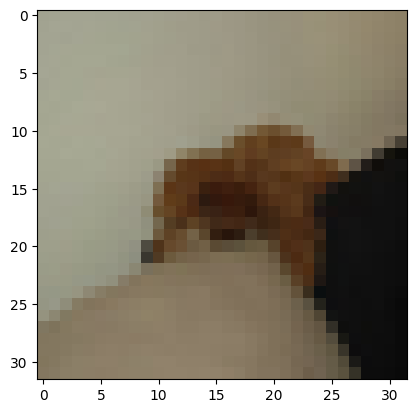

In [ ]:
id_image=6580
print(train_images[id_image].shape)
print(train_labels[id_image])
plt.imshow(train_images[id_image])

**About the labels**

In [ ]:
print(train_labels)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
import numpy as np

# Transformar la matriz a forma [1, n]
train_labels = train_labels.reshape(-1).T  # Elimina la dimensión de tamaño 1
test_labels=test_labels.reshape(-1).T

# Imprimir la matriz transformada
print("Matriz transformada:")
print(train_labels)
print(test_labels)


Matriz transformada:
[6 9 9 ... 9 1 1]
[3 8 8 ... 5 1 7]


**Visualizing a sample of the data**

(50000, 32, 32, 3)
(10000, 32, 32, 3)
Cantidad de clases: 10


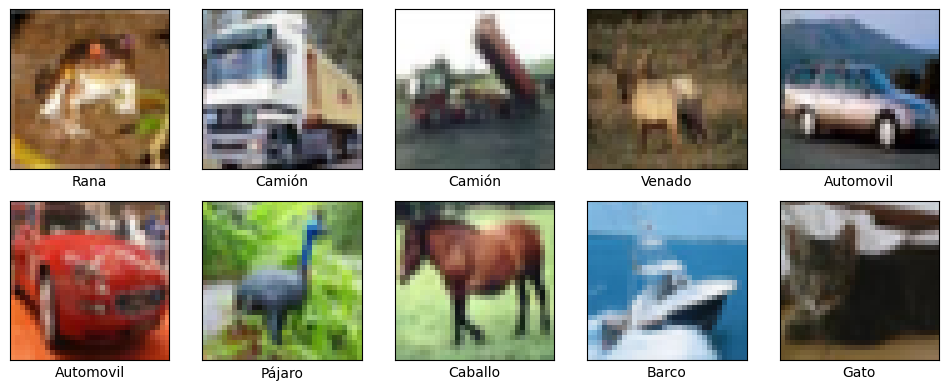

In [ ]:
#Explore data images
#Mapping the label number to the following text labels
class_names = ['Avión', 'Automovil', 'Pájaro', 'Gato', 'Venado',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']
plt.figure(figsize=(12,12))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])

#Datasets cardinality
print(train_images.shape) #50000 images with size of 32x32 pixel
print(test_images.shape) #10000 images with size of 32x32 pixel
print('Cantidad de clases:', len(class_names))


**Transforming the images to gray scale**

In [ ]:
#Training data
temporal=[]
for img in train_images:
  temporal.append(color.rgb2gray(np.array(img)))

train_images=np.array(temporal)

#Test data
temporal=[]
for img in test_images:
  temporal.append(color.rgb2gray(np.array(img)))
test_images=np.array(temporal)

**An example of a grayscale image**

(32, 32)
5


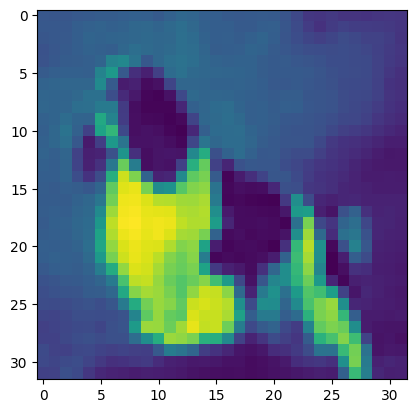

In [ ]:
id_image=10586
print(train_images[id_image].shape)
print(train_labels[id_image])
plt.imshow(train_images[id_image])


**Scaling the dataset**

In [ ]:
#Scaling  images between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images[1].shape
print(train_images[1])

[[0.00265795 0.00206983 0.00159267 ... 0.00142129 0.00135321 0.00122694]
 [0.00240521 0.00232791 0.00191458 ... 0.0014894  0.00120053 0.0011028 ]
 [0.00234466 0.00222574 0.00176522 ... 0.00123129 0.00105334 0.00103907]
 ...
 [0.00259328 0.00238151 0.00245207 ... 0.00055124 0.00084565 0.00131798]
 [0.00237544 0.00232624 0.00244837 ... 0.00146623 0.00178924 0.00190459]
 [0.00229402 0.0022799  0.00239645 ... 0.0020847  0.00209903 0.00209024]]


Building a neural network

In [ ]:
#Diseño de la Red Neuronal (NN), capa de entrada, capas ocultas y capa de salida
model = keras.Sequential([#Inicio de la red
    keras.layers.Flatten(input_shape=train_images[1].shape), #Capas de entrada con conversión de la entrada de imágenes de 32x32 pixeles con 3 canales de color RGB para aplanarse y convertirse en un vector unidimensional = 1024 para integrar a la red neuronal
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu), #Capa oculta con 128 neuronas con una función de activación ReLU
    keras.layers.Dense(64, activation=tf.nn.relu), #Capa oculta con 64 neuronas con función de activación ReLU
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax) #Capa de salida con 10 salidas correspondiente a las 10 clases de clasificación con función de activación Softmax
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 700,114 (2.67 MB)

 Trainable params: 700,114 (2.67 MB)

 Non-trainable params: 0 (0.00 B)

Training process

In [ ]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.0970 - loss: 2.3027
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.0978 - loss: 2.3028
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.0993 - loss: 2.3027
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.0999 - loss: 2.3027
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.0989 - loss: 2.3028
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.1005 - loss: 2.3027
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.1003 - loss: 2.3027
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.0981 - loss: 2.3027
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.0948 - loss: 2.3027
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.0975 - loss: 2.3027
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.0999 - loss: 2.3027
Epoch 12

Testing process

In [ ]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


Function to display predictions

In [ ]:
#Utilitary functions
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)


def plot_value_array(i, labels, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks(labels)
    plt.xticks(np.arange(10), labels, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    plt.xlabel('class', fontsize=10)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')



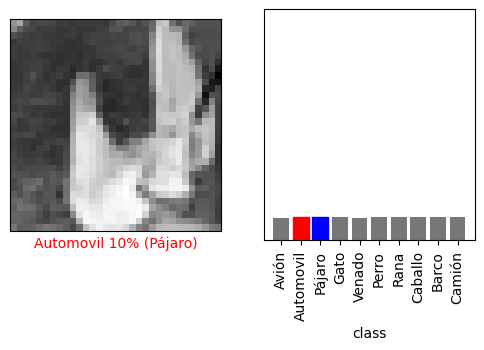

In [ ]:
id_image=25#Change the number of image
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(id_image, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(id_image, class_names,predictions,  test_labels)